In [1]:
import cv2
import random
import time
import numpy as np
from scipy import misc

from matplotlib import pyplot as plt
from scipy import misc
%matplotlib inline
plt.style.use('ggplot')
import os
import sys
sys.path.append('../common/')
import utils

In [2]:
import pickle

In [3]:
import pickle
with open('./xy.pkl','rb') as whdl:
    (IM_train,y_train,IM_test) = pickle.load(whdl)

In [4]:
len(IM_train),len(y_train)

(58546, 58546)

In [5]:
?cv2.calcHist

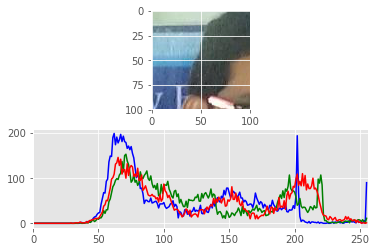

In [6]:
#histr = cv2.calcHist([IM_train[0]],[1],None,[256],[0,256])
color = ('b','g','r')
plt.subplot(2,1,1)
plt.imshow(IM_train[0])
plt.subplot(2,1,2)
for i,col in enumerate(color):
    histr = cv2.calcHist([IM_train[0]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

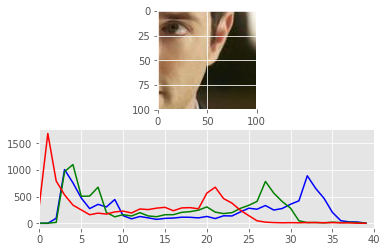

In [7]:
#histr = cv2.calcHist([IM_train[0]],[1],None,[256],[0,256])
color = ('b','g','r')
plt.subplot(2,1,1)
plt.imshow(IM_train[188])
plt.subplot(2,1,2)
for i,col in enumerate(color):
    histr = cv2.calcHist([IM_train[188]],[i],None,[40],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,40])
plt.show()

In [8]:
np.where(np.asarray(y_train)==1)[0][:10]

array([ 41,  42,  46, 110, 111, 115, 177, 181, 182, 183], dtype=int64)

In [9]:

pb = utils.ProgressBar(worksum=len(IM_train))
pb.startjob()
features = []
targets = []
for one_image,one_target in zip(IM_train,y_train):
    one_feature = []
    if len(one_image.shape) != 3:
        continue
    for i,col in enumerate(color):
        histr = cv2.calcHist([one_image],[i],None,[40],[0,256]).T[0]
        one_feature.append(histr)
    one_feature = np.concatenate(one_feature)
    features.append(one_feature)
    targets.append(one_target)
    pb.complete(1)

 3.18 % [=>-------------------------------------------------] 1860/58546 	 used:0s eta:5 s

 6.24 % [===>-----------------------------------------------] 3655/58546 	 used:0s eta:5 s

 9.40 % [====>----------------------------------------------] 5504/58546 	 used:0s eta:5 s

 12.61 % [======>--------------------------------------------] 7385/58546 	 used:0s eta:5 s

 15.85 % [=======>-------------------------------------------] 9282/58546 	 used:0s eta:4 s

 18.97 % [=========>-----------------------------------------] 11109/58546 	 used:1s eta:4 s

 22.12 % [===========>---------------------------------------] 12952/58546 	 used:1s eta:4 s

 25.32 % [============>--------------------------------------] 14826/58546 	 used:1s eta:4 s

 28.29 % [==============>------------------------------------] 16563/58546 	 used:1s eta:4 s

 31.28 % [===============>-----------------------------------] 18311/58546 	 used:1s eta:4 s

 34.47 % [=================>---------------------------------] 20181/58546 	 used:2s eta:3 s

 37.76 % [==================>--------------------------------] 22106/58546 	 used:2s eta:3 s

 41.03 % [====================>------------------------------] 24019/58546 	 used:2s eta:3 s

 44.25 % [======================>----------------------------] 25905/58546 	 used:2s eta:3 s

 47.02 % [=======================>---------------------------] 27528/58546 	 used:2s eta:3 s

 49.82 % [========================>--------------------------] 29165/58546 	 used:2s eta:3 s

 52.78 % [==========================>------------------------] 30903/58546 	 used:3s eta:2 s

 56.03 % [============================>----------------------] 32806/58546 	 used:3s eta:2 s

 59.35 % [=============================>---------------------] 34749/58546 	 used:3s eta:2 s

 62.58 % [===============================>-------------------] 36636/58546 	 used:3s eta:2 s

 65.91 % [================================>------------------] 38587/58546 	 used:3s eta:2 s

 69.10 % [==================================>----------------] 40457/58546 	 used:4s eta:1 s

 72.11 % [====================================>--------------] 42216/58546 	 used:4s eta:1 s

 75.16 % [=====================================>-------------] 44006/58546 	 used:4s eta:1 s

 78.41 % [=======================================>-----------] 45908/58546 	 used:4s eta:1 s

 81.61 % [========================================>----------] 47777/58546 	 used:4s eta:1 s

 84.57 % [==========================================>--------] 49514/58546 	 used:5s eta:0 s

 87.81 % [===========================================>-------] 51408/58546 	 used:5s eta:0 s

 90.95 % [=============================================>-----] 53247/58546 	 used:5s eta:0 s

 94.00 % [===============================================>---] 55034/58546 	 used:5s eta:0 s

 96.45 % [================================================>--] 56466/58546 	 used:5s eta:0 s

 99.21 % [=================================================>-] 58085/58546 	 used:5s eta:0 s

 99.88 % [=================================================>-] 58476/58546 	 used:6s eta:0 s

In [10]:
len(features),len(targets)

(58476, 58476)

In [11]:
train_x,val_x = features[:-10000], features[-10000:]
train_y,val_y = targets[:-10000], targets[-10000:]

In [12]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

In [14]:
lr_model = lr.fit(train_x,train_y)

In [15]:
val_pred = lr_model.predict_proba(val_x)[:,1]

In [16]:
val_pred

array([0.08881242, 0.14671995, 0.12169656, ..., 0.00758695, 0.00321514,
       0.00099317])

In [17]:
from sklearn import metrics

In [18]:
 fpr, tpr, thresholds = metrics.roc_curve(val_y, val_pred, pos_label = 1)

In [19]:
metrics.auc(fpr, tpr)

0.805445620106831

In [20]:
def get_feature(input_img):
    one_feature = []
    for i,col in enumerate(color):
        histr = cv2.calcHist([input_img],[i],None,[40],[0,256]).T[0]
        one_feature.append(histr)
    one_feature = np.concatenate(one_feature)

    return one_feature

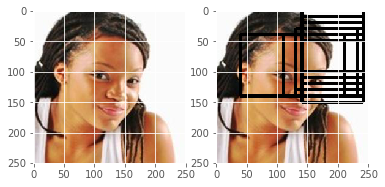

In [21]:

sample_image = np.copy(IM_test[23])
plt.subplot(1,2,1)
plt.imshow(sample_image)
for i in range(0,250 - 100,10):
    for j in range(0,250 - 100,10):
        one_feature = get_feature(sample_image[i:i + 100,j:j + 100])
        result = lr_model.predict_proba([one_feature])
        #print(result)
        if result[0][1] > 0.1:
            cv2.rectangle(sample_image,(i,j),(i + 100,j + 100),(0,0,0),3)
plt.subplot(1,2,2)
plt.imshow(sample_image)

In [22]:
result

array([[0.99579845, 0.00420155]])